Winding number algorithm

$$
wn=\frac{1}{2\pi} \sum_{i}^{n-1}\theta_{i} = \frac{1}{2\pi} \sum_{i}^{n-1}\frac{\vec{v_{i}P} \cdot \vec{v_{i+1}P}}{|\vec{v_{i}P}||\vec{v_{i+1}P}|}
$$

Target point is inside of closed polygon if $wn=1$, where $n$ is the number of vertex of a closed polygon, and $\theta$ is an angle spanned by line between the target point and each vertex. Angle should be measured in counter-clockwise, and the sign of angle is determined by that of outer product of vectors. 

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

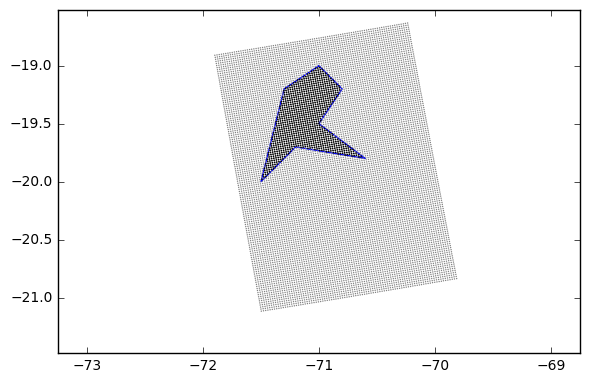

In [4]:
polygon=np.loadtxt('Polygon.txt')
xp=polygon[:,0]
yp=polygon[:,1]

target=np.loadtxt('TargetPoints.txt')
xt=target[:,1]
yt=target[:,0]

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xt,yt,s=1,edgecolor='none',facecolor='gray')
ax.plot(xp,yp,'b-',ms=5,zorder=0)

for j in np.arange(len(xt)):
    theta=0
    for i in np.arange(len(xp)-1):
        a=(xt[j]-xp[i])*(xt[j]-xp[i+1])+(yt[j]-yp[i])*(yt[j]-yp[i+1])
        b=np.sqrt((xt[j]-xp[i])  **2+(yt[j]-yp[i])  **2)
        c=np.sqrt((xt[j]-xp[i+1])**2+(yt[j]-yp[i+1])**2)
        t=np.arccos(a/(b*c))

        ov=(xt[j]-xp[i])*(yt[j]-yp[i+1])-(xt[j]-xp[i+1])*(yt[j]-yp[i])
        if ov<0:
            t=t*(-1.0)

        theta=theta+t

    wn=0.5/np.pi*theta
    wn = float('%1.3f' % (wn))
    if wn>0.0:
        ax.scatter(xt[j],yt[j],s=1.5,linewidth=0.1,facecolor='k', \
                  edgecolor='none')


plt.axes().set_aspect('equal', 'datalim')
plt.tight_layout()
plt.savefig('WindingNumber.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()